<h1>Project: Blog project - Stack Overflow survey 2022</h1>

<h2>Section 1: Bussiness Understanding</h2>
    <p>Today, IT jobs are one of the most important and with the most demand in the job scenario. With COVID-19 pandemic these jobs turned even more important, with the increase of remote works and the necessity of new technologies to assist remote jobs and other things that emerged in this scenario like oline events.</p>
    <p>Many developers question yourself what degree they need to take a job. If they only need secondary school, bachelor, master, or others. Based in that, I decided to do an analisys to help these people with that. For this, I'll use data from Stack Overflow survey from 2022, that you can access <a href = 'https://insights.stackoverflow.com/survey'>here</a>. I want to emphasize that this work only respond some anserws, many more can be questioned and answered based on this analysys and some more code.</p>
    <p>Some of the questions I'll respond in this work are:</p>
    <ol>
        <li>Question 1: What's the relationship between salary and educational level</li>
        <li>Question 2: What's the relationship between gender and educational level ?</li>
        <li>Question 3: What kind of jobs is more likely to people with each degree work with ? </li>
    </ol>
<p>A resume and more non-technical approach you can see in this <a href = ''>blog post</a></p>

In [1]:
#Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#import regex
import re

#import statsmodels
import statsmodels.api as sm

warnings.filterwarnings('ignore')

<h2>Section 2: Data Understanding</h2>

<h3>Gather</h3>

In [2]:
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

In [3]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [4]:
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


This schema is used to see what is the question for each column using the function "get_info()" . Something important to note is that there are some columns that are not in this schema. The columns we are insterested are "qname" which is the name of the column and "question" wich is the question.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

With this we can get a broad perspective of the dataset. For more infomation about each column we can use the fuctino "get_info". Later we will transform the YearsCode column into float and change some column names.

<h3>Functions</h3>

In [6]:
def get_info(column, df, schema, info = 'question'):
    
    '''Shows question and answers of the column
    
    INPUT:
    column - column of the dataframe
    schema - dataframe with the informations
    info - information to show
    
    OUTPUT:
    print question and answers 
    '''
    
    question = list(schema[schema['qname'] == column][info])[0]
    
    print('Question: {}\n Answers: {}'.format(question, df[column].unique()))



def explode(data, column):

    '''Explode a column with more than one answer marked to for a dataframe with one 
    answer per row.
    
    INPUT: 
    data - daframe with the column to be exploded
    column - column wich will be exploded]
    
    OUTPUT:
    df_exploded - dataframe exploded'''

    column_to_explode = data[column].str.split(';')
    df_to_explode = data.join(column_to_explode, lsuffix = '_original')
    df_exploded = df_to_explode.explode(column)
    
    return df_exploded



def replace_answers(column, order, df, inplace = False):
    
    '''replace a answer with more than one option marked for answer with one option.
    
    INPUT:
    column - column where the answers will be replaced
    order - order which answers will be replaced, the answer will be replaced by element 
    that appears first
    df - dataframe
    inplace - whether or not the dataframe will be substituted

    OUTPUT: 
    dataframe with answers substituted
    '''

    df[column] = df[column].astype(str)
    for i in range(len(order)):
        for answer in df[column].unique():
            if re.search(order[i], answer):
                replace_by = order[i]
        
                df[column].replace({answer : replace_by}, inplace = inplace)
    
    return df 



def countplot_normalized(data, y = None, x = None ,orient = None, sort = True, 
                         ascending = False, bins = None, dropna = True, 
                         color = sns.color_palette()[0], order = None, rotation = 90, 
                         palette = None):
    
    '''function similar to countplot function from seaborn, but with values of count 
    normalized
    
    INPUT:
    data, y, x, orient, color, palette - see in barplot function from seaborn
    normalize, sort, ascending, bins, dropna - see in value_counts method from pandas
    
    OUTPUT:
    chart similar to countplot function from seaborn
    '''

    if y != None:
        count = data[y].value_counts(normalize = True, sort = sort, ascending = ascending,
                                     bins = bins, dropna = dropna)
        if order is not None:
            count = count.reindex(order)
        plot = sns.barplot(count, count.index, color = color, orient = orient,
                           palette = palette)

    if x != None:
        count = data[x].value_counts(normalize = True, sort = sort, ascending = ascending,
                                     bins = bins, dropna = dropna)
        if order is not None:
            count = count.reindex(order)
        plot = sns.barplot(count.index,count , color = color, orient = orient, 
                           palette = palette)
        plt.xticks(rotation = rotation)
        


def countplot_normalized_exploded(data, y = None, x = None ,orient = None, sort = True, 
                                  ascending = False, bins = None, dropna = True,
                                  color = sns.color_palette()[0], order = None, 
                                  rotation = 90, palette = None):
    
    '''function similar to countplot function from seaborn and countplot_normalized, 
    but with values of count normalized. This function is the substituted for 
    countplot_normalize for column that need to be exploded. The sum of values won't be
    1
    
    INPUT:
    data - non-exploded data
    y, x, orient, color, palette - see in barplot function from seaborn
    normalize, sort, ascending, bins, dropna - see in value_counts method from pandas
    
    OUTPUT:
    chart similar to countplot function from seaborn
    '''
    
    if y != None:
        exploded_data = explode(data, y)
        count = exploded_data[y].value_counts(sort = sort, ascending = ascending,
                                              bins = bins, dropna = dropna)/data[y].count()
        if order is not None:
            count = count.reindex(order)
        sns.barplot(count, count.index, color = color, orient = orient,
                           palette = palette)

        
    if x != None:
        exploded_data = explode(data, x)
        count = exploded_data[x].value_counts(sort = sort, ascending = ascending, 
                                              bins = bins, dropna = dropna)/data[x].count()
        if order is not None:
            count = count.reindex(order)
        sns.barplot(count.index,count , color = color, orient = orient,
                           palette = palette)
        plt.xticks(rotation = rotation)

<h3>Assess</h3>

In [7]:
get_info(df = df, column = 'MainBranch', schema = schema)

Question: Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b>
 Answers: ['None of these' 'I am a developer by profession'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I code primarily as a hobby' 'I am learning to code'
 'I used to be a developer by profession, but no longer am']


In [8]:
#Select only people who works as developer
df_use = df.query('MainBranch == "I am a developer by profession"')

In [9]:
# Selecting necessary columns
df_use = df[['Employment', 'RemoteWork', 'EdLevel', 'DevType',
             'YearsCode', 'Age', 'OrgSize', 'Country',
             'Gender', 'Knowledge_4', 'Knowledge_7',
             'Frequency_1', 'TimeSearching', 'TimeAnswering',
             'TrueFalse_1', 'ConvertedCompYearly']]

In [10]:
# As we are interested in studying relationships with educational level, we will drop those columns with none answers
df_use = df_use[df_use.EdLevel.notnull()]

EdLevel                    0
Country                    0
Employment                57
YearsCode                367
Age                      753
Gender                   850
DevType                10331
RemoteWork             12710
OrgSize                20582
ConvertedCompYearly    33517
TimeSearching          35390
TimeAnswering          35567
TrueFalse_1            35766
Frequency_1            36213
Knowledge_4            36485
Knowledge_7            36604
dtype: int64

50007     0
53673     0
20689     0
20688     0
39587     0
         ..
53747    13
4685     13
72531    13
12751    13
26600    14
Length: 71571, dtype: int64

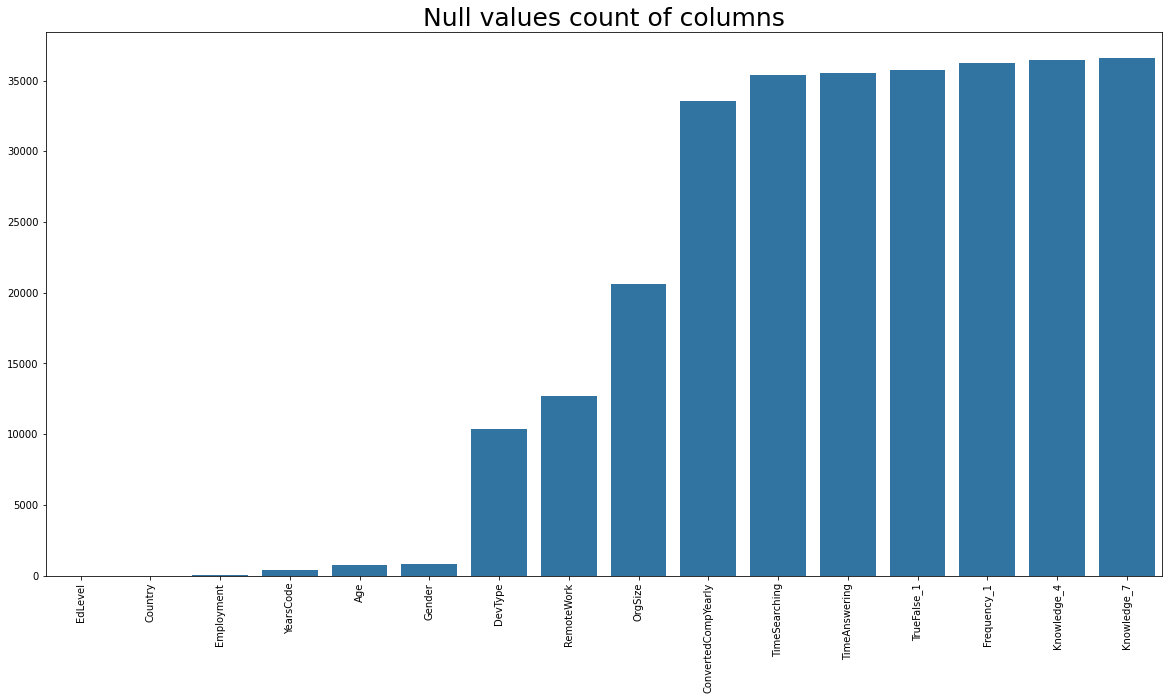

In [11]:
# Analysing null values
display(df_use.isnull().sum(axis = 0).sort_values())
display(df_use.isnull().sum(axis = 1).sort_values())

plt.figure(figsize = (20,10));
sns.barplot(df_use.isnull().sum(axis = 0).sort_values().index, df_use.isnull().sum(axis = 0).sort_values(), color = sns.color_palette()[0]);
plt.xticks(rotation = 90);
plt.title('Null values count of columns', size = 25);

In [12]:
# Rows with less than 5 values has no value information
df_use.dropna(how = 'all', thresh = 4, inplace = True)

<h3>Explore</h3>

In [13]:
sns.set_theme(rc = {'figure.figsize':(12, 8)}, style = 'whitegrid')

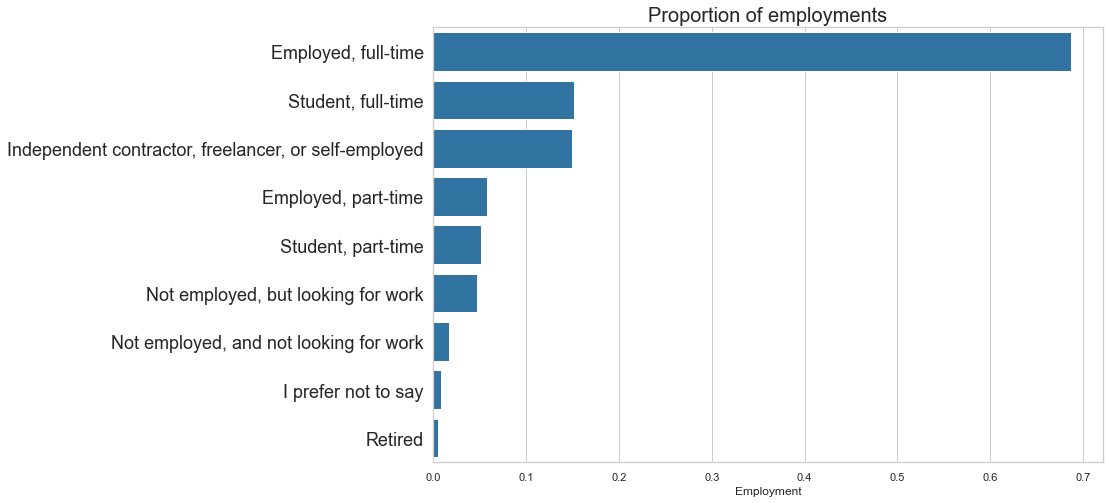

In [14]:
countplot_normalized_exploded(df_use, 'Employment');
plt.title('Proportion of employments', fontsize = 20);
plt.yticks(ticks = range(9), fontsize = 18);

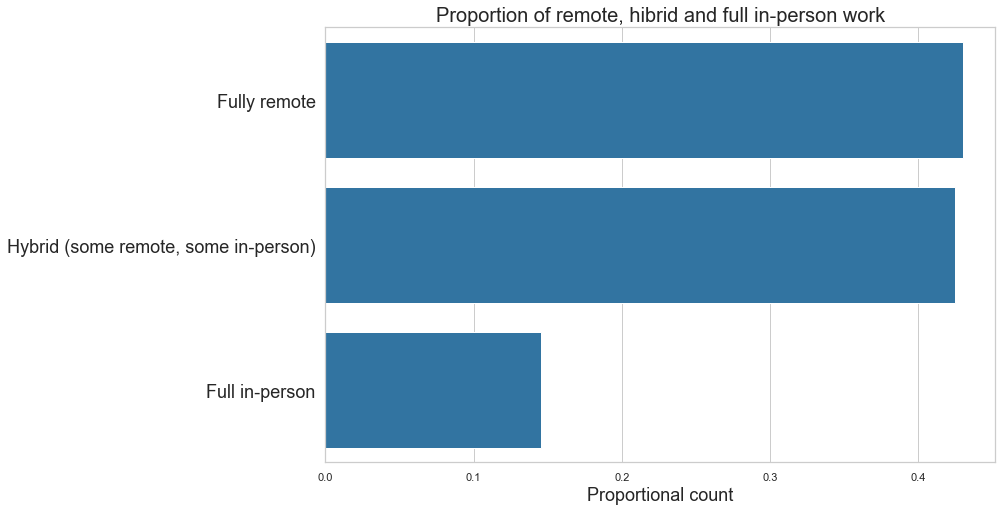

In [15]:
countplot_normalized(df_use, 'RemoteWork')
plt.title('Proportion of remote, hibrid and full in-person work', fontsize = 20)
plt.xlabel('Proportional count', fontsize = 18);
plt.yticks(ticks = range(3), fontsize = 18);

Text(0.5, 1.0, 'Histogram of years coding experience')

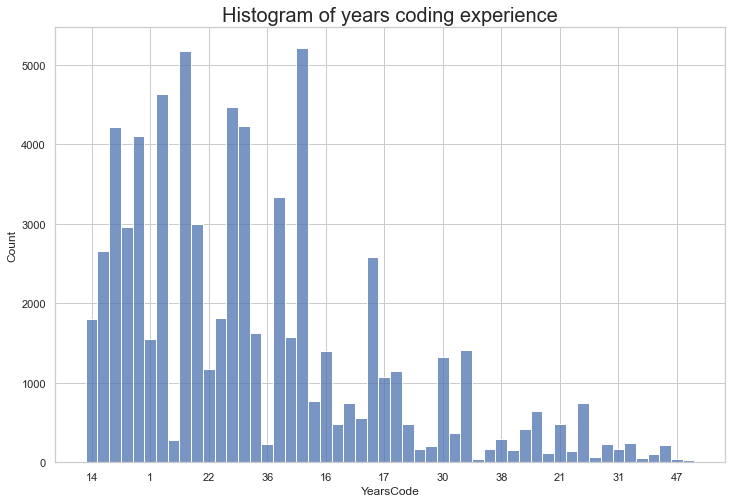

In [16]:
sns.histplot(df_use['YearsCode'], binwidth = 2);
plt.xticks(range(0, 55, 5));
plt.title('Histogram of years coding experience', fontsize = 20)

In [17]:
get_info(df = df_use, column = 'EdLevel', schema = schema)

Question: Which of the following best describes the highest level of formal education that you’ve completed? *
 Answers: ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Some college/university study without earning a degree' 'Something else'
 'Primary/elementary school' 'Other doctoral degree (Ph.D., Ed.D., etc.)'
 'Associate degree (A.A., A.S., etc.)'
 'Professional degree (JD, MD, etc.)']


In [18]:
order_EdLevel = ['Primary/elementary school',
                 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                 'Some college/university study without earning a degree',
                 'Associate degree (A.A., A.S., etc.)',
                 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
                 'Other doctoral degree (Ph.D., Ed.D., etc.)',
                 'Professional degree (JD, MD, etc.)',
                 'Something else']

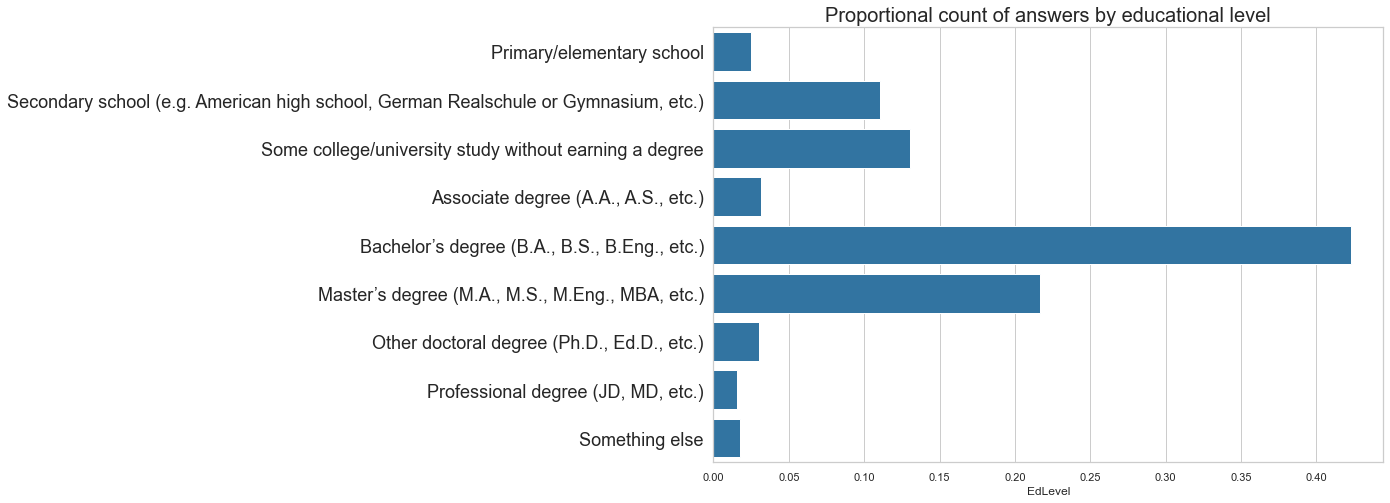

In [19]:
countplot_normalized(df_use, 'EdLevel', order = order_EdLevel);
plt.title('Proportional count of answers by educational level', fontsize = 20);
plt.yticks(ticks = range(0, 9), labels = order_EdLevel, fontsize = 18);

In [20]:
get_info(df = df, column = 'OrgSize', schema = schema)

Question: Approximately how many people are employed by the company or organization you currently work for? 
 Answers: [nan '20 to 99 employees' '100 to 499 employees' 'I don’t know'
 'Just me - I am a freelancer, sole proprietor, etc.' '2 to 9 employees'
 '5,000 to 9,999 employees' '1,000 to 4,999 employees'
 '10,000 or more employees' '500 to 999 employees' '10 to 19 employees']


In [21]:
order_OrgSize = ['Just me - I am a freelancer, sole proprietor, etc.',
                 '2 to 9 employees',
                 '10 to 19 employees',
                 '20 to 99 employees',
                 '100 to 499 employees',
                 '500 to 999 employees',
                 '1,000 to 4,999 employees',
                 '5,000 to 9,999 employees',
                 '10,000 or more employees',
                 'I don’t know']

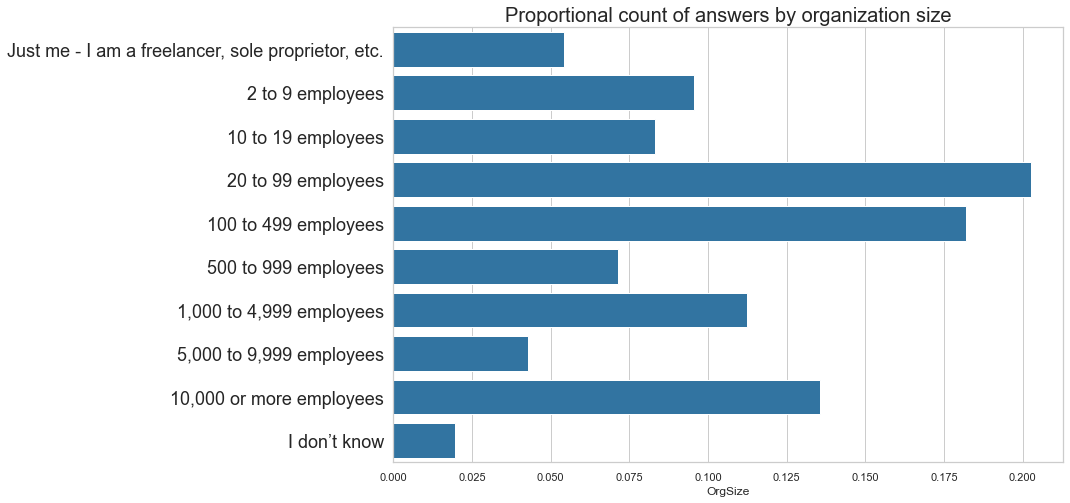

In [22]:
countplot_normalized(df_use, 'OrgSize', order = order_OrgSize);
plt.title('Proportional count of answers by organization size', fontsize = 20);
plt.yticks(ticks = range(10), labels = order_OrgSize, fontsize = 18);

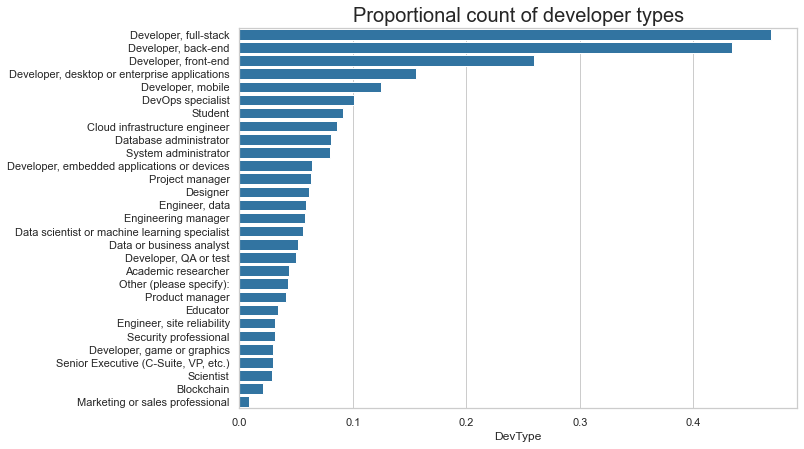

In [23]:
plt.figure(figsize = (10, 7))
countplot_normalized_exploded(df_use, 'DevType')
plt.title('Proportional count of developer types', fontsize = 20);

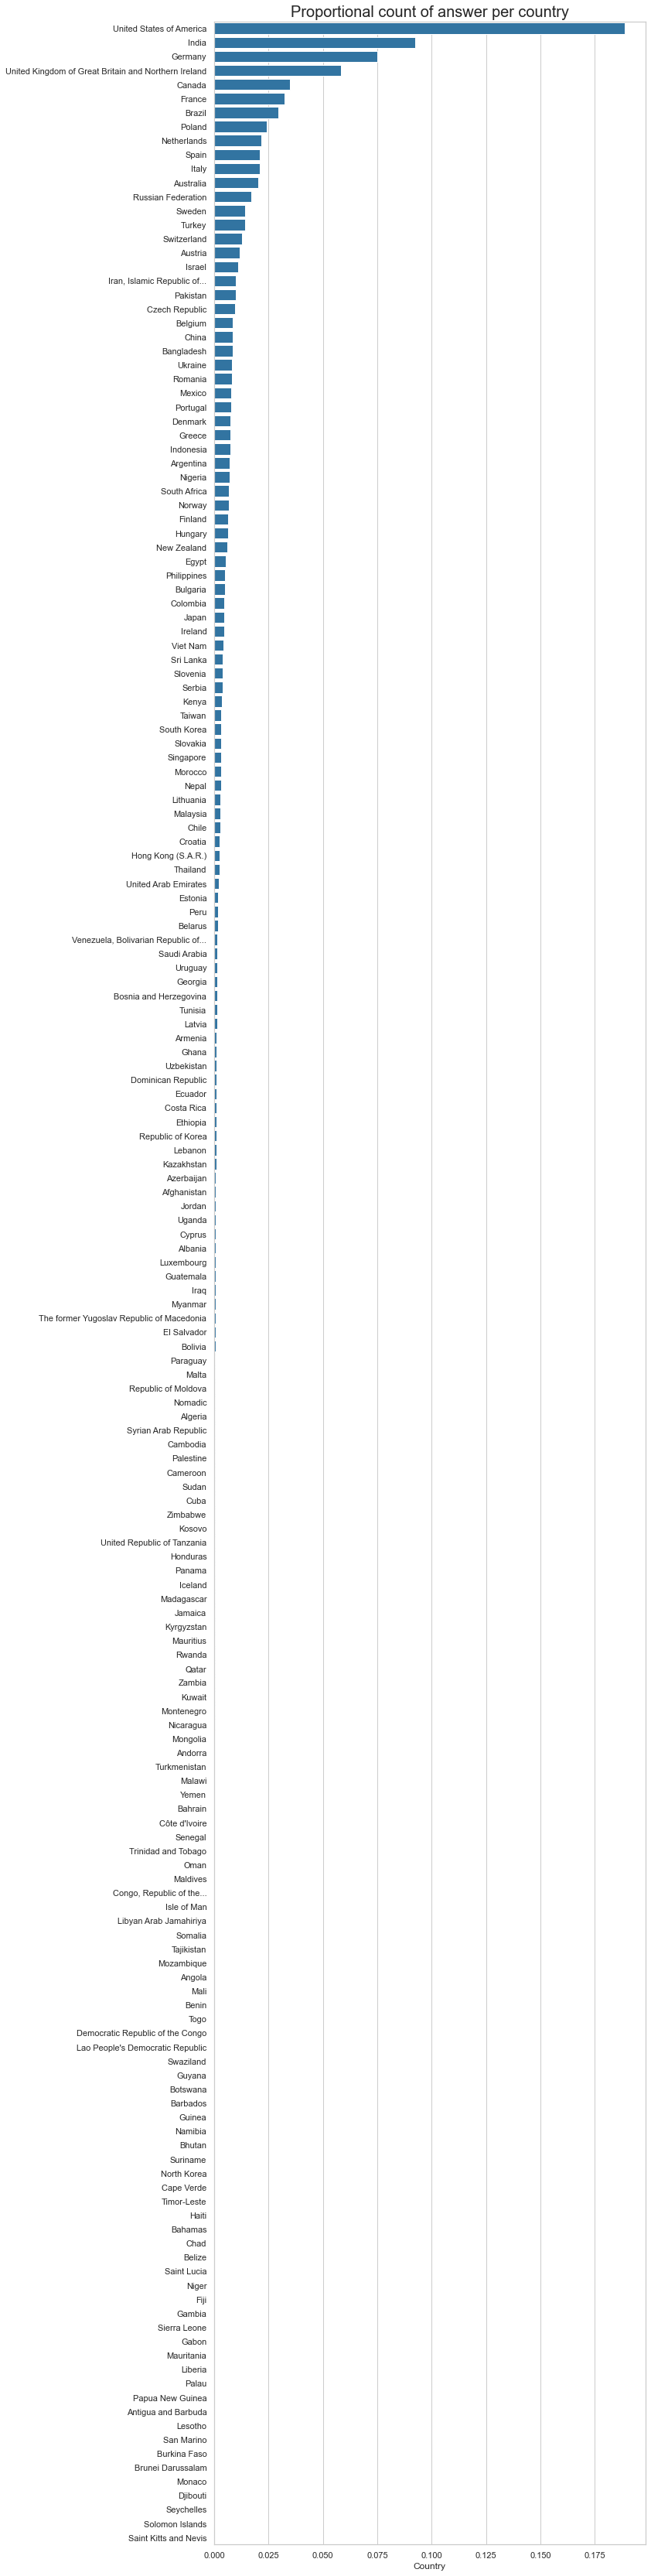

In [24]:
plt.figure(figsize = (10, 60))
countplot_normalized(df_use, 'Country');
plt.title('Proportional count of answer per country', fontsize = 20);

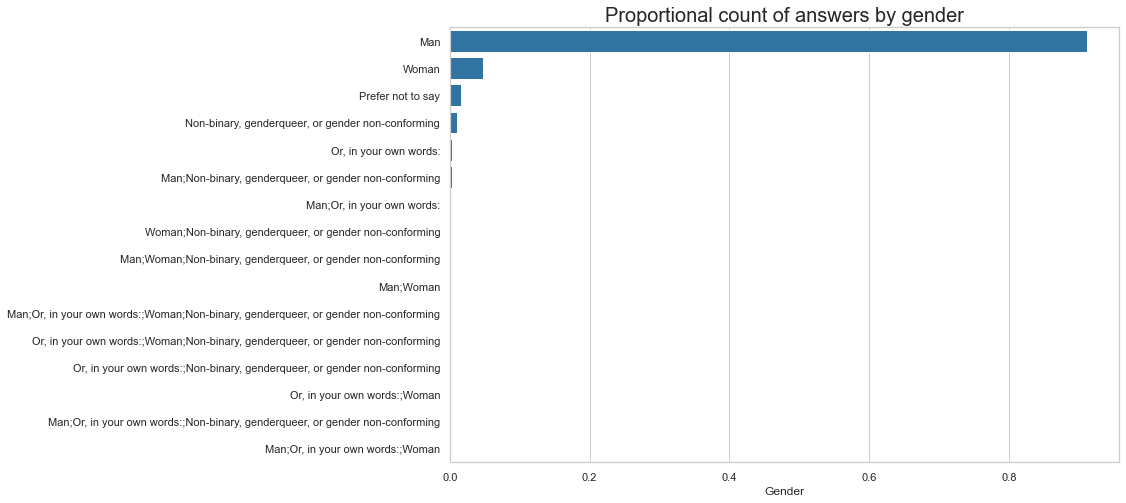

In [25]:
countplot_normalized(df_use, 'Gender');
plt.title('Proportional count of answers by gender', fontsize = 20);

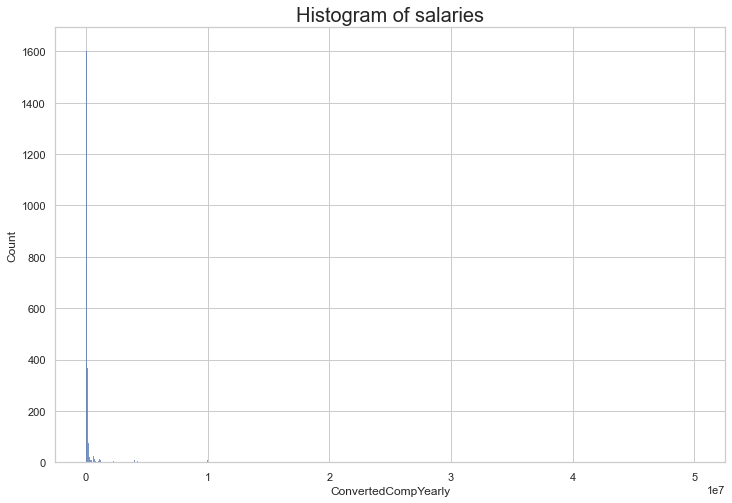

In [26]:
sns.histplot(df_use['ConvertedCompYearly']);
plt.title('Histogram of salaries', fontsize = 20);

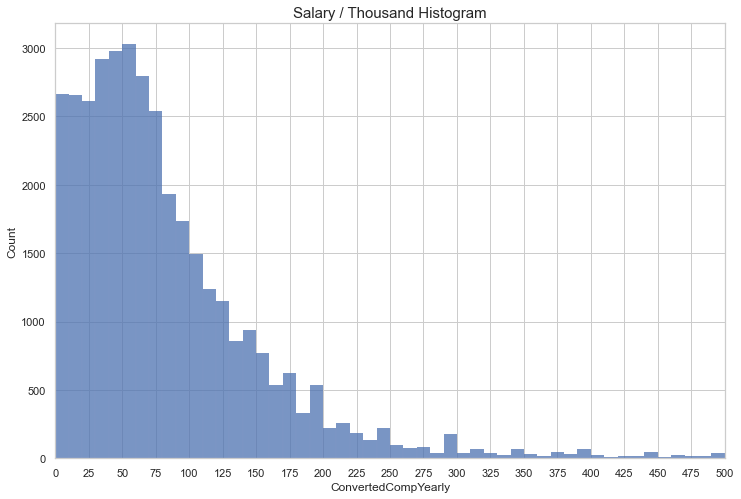

In [27]:
plt.title('Salary / Thousand Histogram', fontsize = 15);
sns.histplot(x = 'ConvertedCompYearly', data = df_use, binwidth = 10000);
plt.xlim((0, 500000));
plt.xticks(ticks = np.arange(0,525e3, 25e3), labels = np.arange(0,525, 25));

<h2>Data Preparation</h2>

<h3>Clean</h3>

In [28]:
# Renaming non-descriptive column names
df_use.rename(columns={'Knowledge_4' : 'AbleFindAnswers', 
                       'Knowledge_7' : 'WaitingAnswersInter', 
                       'Frequency_1' : 'NeedingHelp', 
                       'TrueFalse_1' : 'InvolvedOnboarding', 
                       'ConvertedCompYearly' : 'Salary'}, inplace=True)
schema.replace({'Knowledge_4' : 'AbleFindAnswers',  
                'Knowledge_7' : 'WaitingAnswersInter', 
                'Frequency_1' : 'NeedingHelp', 
                'TrueFalse_1' : 'InvolvedOnboarding',
                'ConvertedCompYearly' : 'Salary'}, inplace=True)

In [29]:
# Renaming EdLevel values
df_use.replace({'Primary/elementary school' : 'Elementary',
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary', 
                'Some college/university study without earning a degree':'Some study without earning a degree',
                'Associate degree (A.A., A.S., etc.)' : 'Associate degree',
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' : 'Bachelor', 
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 'Master', 
                'Other doctoral degree (Ph.D., Ed.D., etc.)' : 'Doctor', 
                'Professional degree (JD, MD, etc.)':'Professional degree'}, inplace = True)

In [30]:
# Cleaning column "Gender"
replace_answers(column = 'Gender', order = ['Non-binary, genderqueer, or gender non-conforming', 
                                            'Or, in your own words:'],df = df_use, inplace = True)
df_use['Gender'].replace({'Man;Woman': 'Non-binary, genderqueer, or gender non-conforming'}, inplace = True)
df_use['Gender'].replace({'Non-binary, genderqueer, or gender non-conforming' : 'Non-binary'}, inplace = True)

In [31]:
# Improving the name of the value
df_use['OrgSize'].replace({'Just me - I am a freelancer, sole proprietor, etc.': 'Just me'}, inplace = True)

In [32]:
# Transforming years coding values from string to float
df_use['YearsCode'].replace({'Less than 1 year' : '0', 'More than 50 years' : '50'}, inplace = True)
df_use['YearsCode'] = df_use['YearsCode'].astype(float)

In [33]:
df_use.drop_duplicates(inplace = True)

<h3> DataFrames</h3>
In this Section I'm organizing the dataframes that I'll use later in the notebook.

In [34]:
top_10_countries = df_use[df_use['Country'].isin(df_use.Country.value_counts().head(10).index)]

In [35]:
df_use_250k = df_use.query('Salary <= 250000')

In [36]:
top_10_countries_250k_non_null = top_10_countries[top_10_countries.Salary.notnull() & top_10_countries.YearsCode.notnull() & (top_10_countries.Salary <= 250000)]
top_10_countries_250k_non_null['intercept'] = 1

top_10_countries_250k_non_null[sorted(top_10_countries.Country.unique())] = pd.get_dummies(top_10_countries_250k_non_null['Country'])

for Country in sorted(top_10_countries.Country.unique()):
    top_10_countries_250k_non_null[Country + '_code'] = top_10_countries_250k_non_null[Country] * top_10_countries_250k_non_null['YearsCode']

top_10_countries_250k_non_null[sorted(top_10_countries_250k_non_null.EdLevel.unique())] = pd.get_dummies(top_10_countries_250k_non_null.EdLevel)

for ed in sorted(top_10_countries_250k_non_null.EdLevel.unique()):
    top_10_countries_250k_non_null[ed + '_code'] = top_10_countries_250k_non_null[ed] * top_10_countries_250k_non_null['YearsCode']


<h3> Exploded dataframes</h3>
In this section there are 2 dataframes that I'll use later wich were needed to explode using the "explode()" function.

In [37]:
exploded_DevType = explode(df_use, 'DevType')

In [38]:
exploded_Employment = explode(df_use, 'Employment')

<h3> Orders of column values</h3>
    In this section I set the crescenting order of some ordinal categorical values. I'll use this in the analysis later.

In [39]:
order_Age = ['Under 18 years old',
 '18-24 years old',
 '25-34 years old',
 '35-44 years old',
 '45-54 years old',
 '55-64 years old',
 '65 years or older',
 'Prefer not to say']

order_DevType = list(exploded_DevType.DevType.value_counts().index)

order_OrgSize = ['Just me',
 '2 to 9 employees',
 '10 to 19 employees',
 '20 to 99 employees',
 '100 to 499 employees',
 '500 to 999 employees',
 '1,000 to 4,999 employees',
 '5,000 to 9,999 employees',
 '10,000 or more employees',
 'I don’t know']

order_EdLevel = ['Elementary',
 'Secondary',
 'Some study without earning a degree',
 'Associate degree',
 'Bachelor',
 'Master',
 'Doctor',
 'Professional degree',
 'Something else']

<h3> Palettes</h3> 
Palettes I'll use later in some graphs

In [40]:
palette_DevType = ['#D61C4E' if Type in ['Data scientist or machine learning specialist',
                                         'Academic researcher', 'Educator', 'Scientist']
                   else '#FEDB39' if Type in ['Student']
                   else '#293462'  
                   for Type in order_DevType]

palette_EdLevel = ['#F637EC' if EdLevel in ['Bachelor', 'Master', 'Doctor'] 
                   else '#3330E4'
                   for EdLevel in order_EdLevel]

<h2>Evaluation</h2>

<h3>Question 1: What's the relationship between salary and educational level</h3>

This boxplot provides an overview of the relationship between salary and educational level

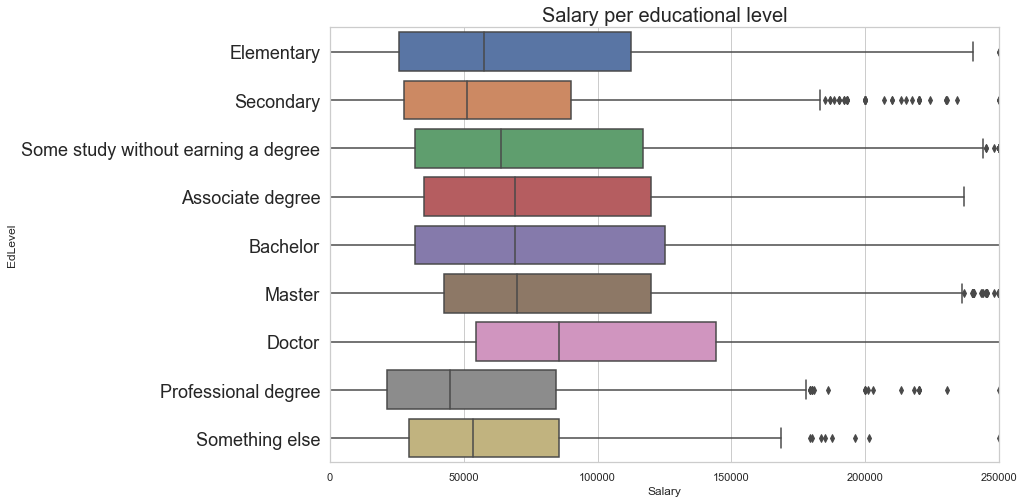

In [41]:
sns.boxplot(x = 'Salary', y = 'EdLevel',  data = df_use, order = order_EdLevel);
plt.title('Salary per educational level', fontsize = 20);
plt.xlim(0, 250000);
plt.yticks(ticks = range(9), fontsize = 18);

In [42]:
# Doctors in general earn 22% more than masters and bachelors
groupby_EdLevel_Salary = df_use.groupby('EdLevel').Salary.median()

groupby_EdLevel_Salary.loc['Doctor'] / groupby_EdLevel_Salary.loc['Master']

1.2216142857142858

We can see that those with master, bachelor and associate degrees gain similary salaries and doctors earn more. We see that those with only elementary school earn more than those with secondary school, this is a strange behavior.

Maybe the experience on coding provides an explication about why those with only elementary school earn more than those with secondary. The boxplot below serves to evaluate that

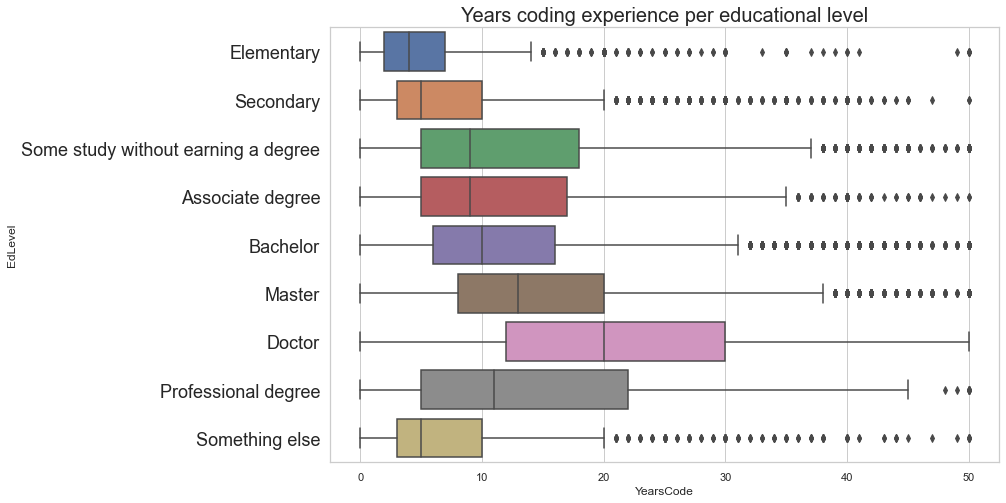

In [43]:
sns.boxplot(data = df_use, x = 'YearsCode', y = 'EdLevel', order = order_EdLevel);
plt.title('Years coding experience per educational level', fontsize = 20);
plt.yticks(ticks = range(9), fontsize = 18);

As we see above, those with secondary school have far more coding experience than those with elementary school. So coding experience is not a explanation for that.
We see here that doctors have far more experience than bachelors, this serves to justify higher salaries

I'll plot a countplot for the relationship between number of people and age for each educational level

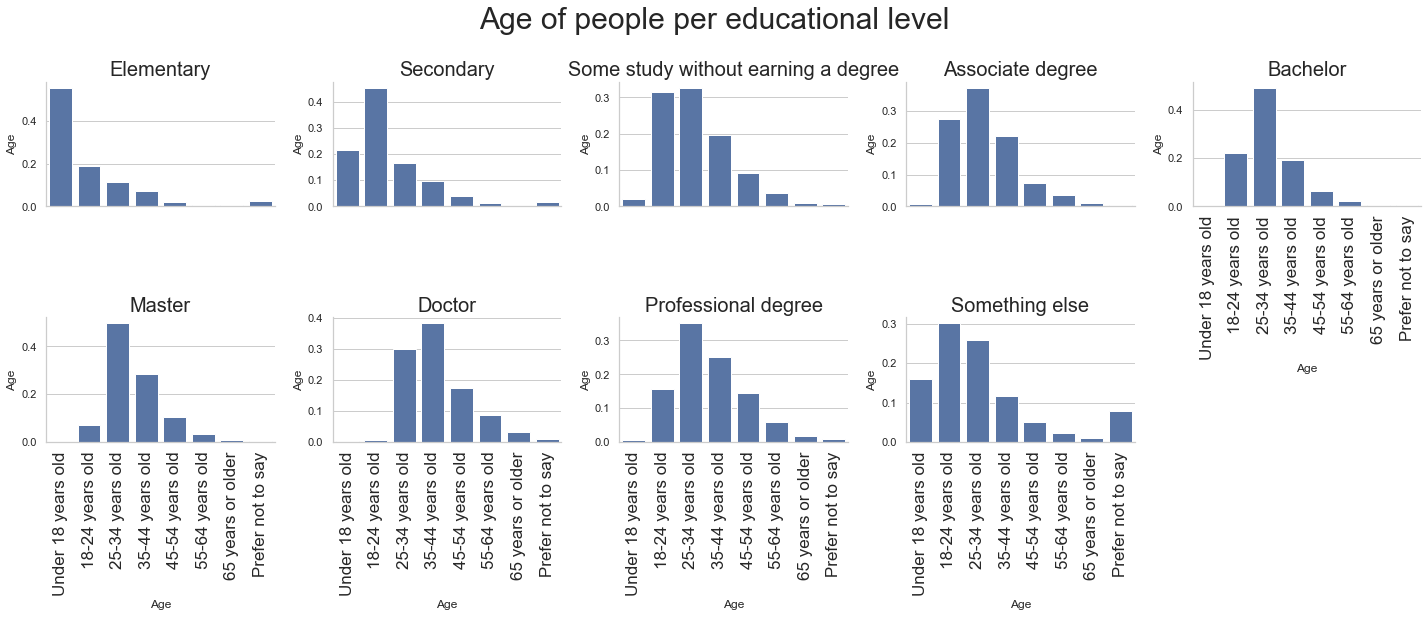

In [44]:
# Age doesn't justify the strange behavior of Elementary salaries
g = sns.FacetGrid(df_use, col = 'EdLevel' , col_wrap = 5, height = 4, sharey = False, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, x = 'Age', order = order_Age);
g.set_titles(col_template = '{col_name}', size = 20);
g.set_xticklabels(fontsize = 17)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Age of people per educational level', fontsize = 30);

We see that lower age is related to lower degree, as expected. So age doesn't justify the high salary for elementary school

Below there are histogram that is plot to try understand better this behavior. Anything was discovered

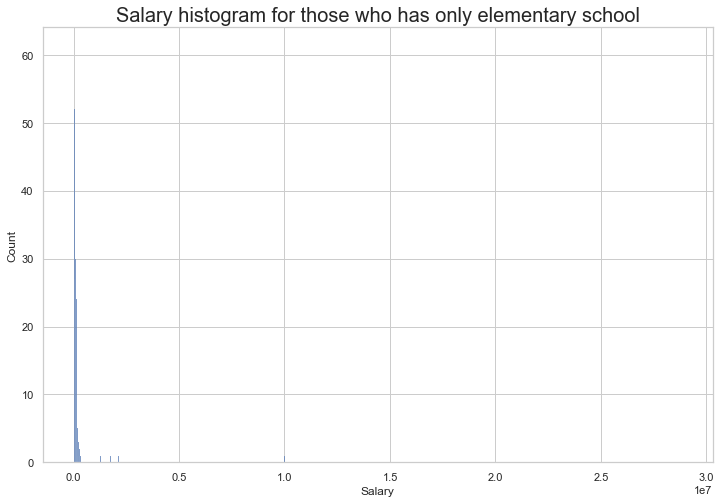

In [45]:
sns.histplot(df_use.query('EdLevel == "Elementary"')['Salary']);
plt.title('Salary histogram for those who has only elementary school', fontsize = 20);

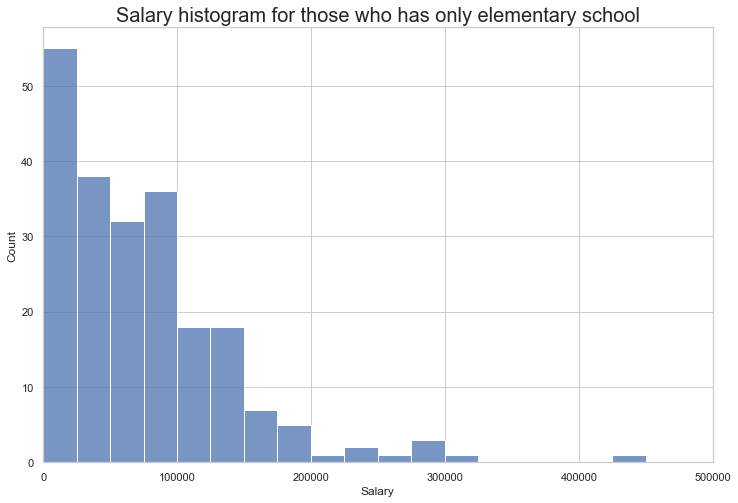

In [46]:
sns.histplot(df_use.query('EdLevel == "Elementary"')['Salary'], bins = range(0, 520000, 25000));
plt.xlim(0, 500000);
plt.title('Salary histogram for those who has only elementary school', fontsize = 20);

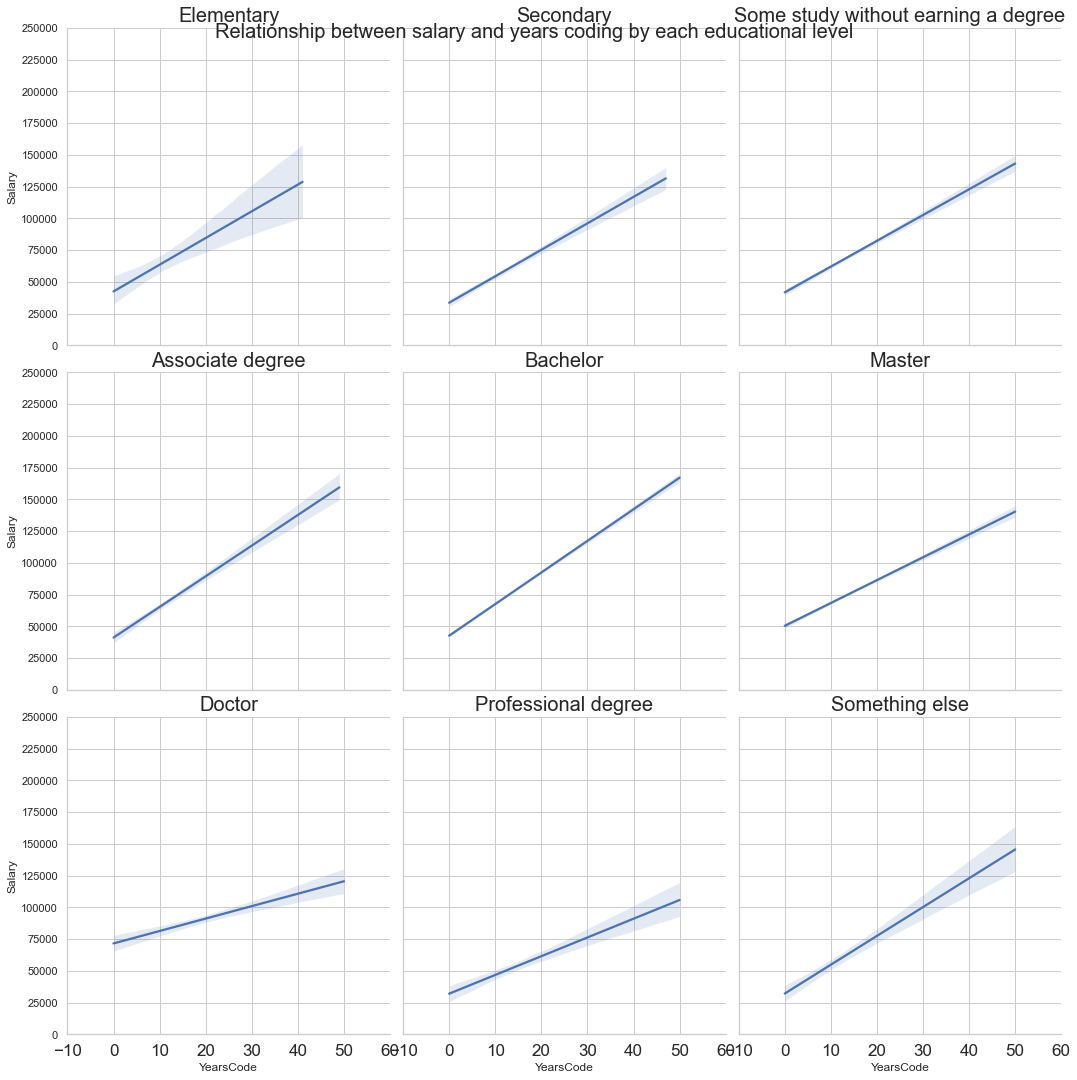

In [47]:
g = sns.lmplot(x = 'YearsCode', y = 'Salary', data = df_use_250k, col = 'EdLevel', col_wrap = 3, scatter_kws = {'alpha': 0}, col_order = order_EdLevel)
plt.ylim(0, 250000)
plt.yticks(np.arange(0, 275000, 25000));
g.fig.suptitle('Relationship between salary and years coding by each educational level', fontsize = 20);
g.set_titles(col_template = '{col_name}', size = 20);
g.set_xticklabels(fontsize = 17);

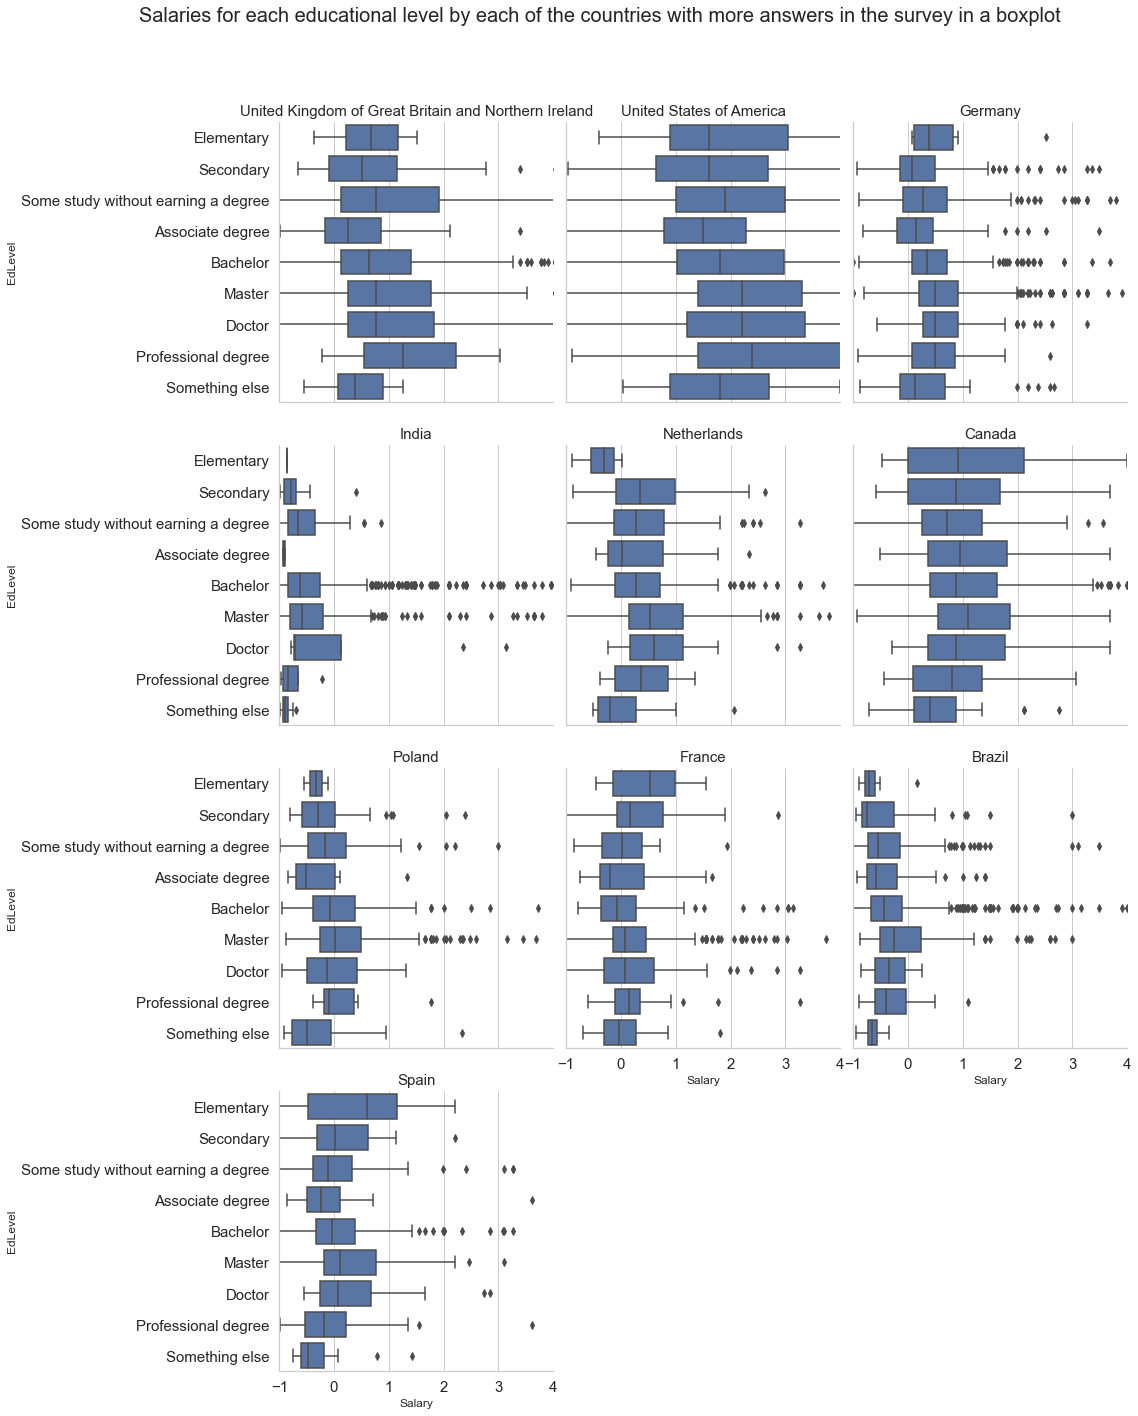

In [48]:
g = sns.FacetGrid(data = top_10_countries, col = 'Country', col_order = top_10_countries.Country.unique(), col_wrap = 3, height = 5);
g.map_dataframe(sns.boxplot, x = 'Salary', y = 'EdLevel', order = order_EdLevel);
g.set(xlim = (0, 250000));
g.set_titles(col_template = '{col_name}', size = 15);
g.set_xticklabels(fontdict = {'fontsize': 15});
g.set_yticklabels(fontdict = {'fontsize': 15});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Salaries for each educational level by each of the countries with more answers in the survey in a boxplot', fontsize = 20);

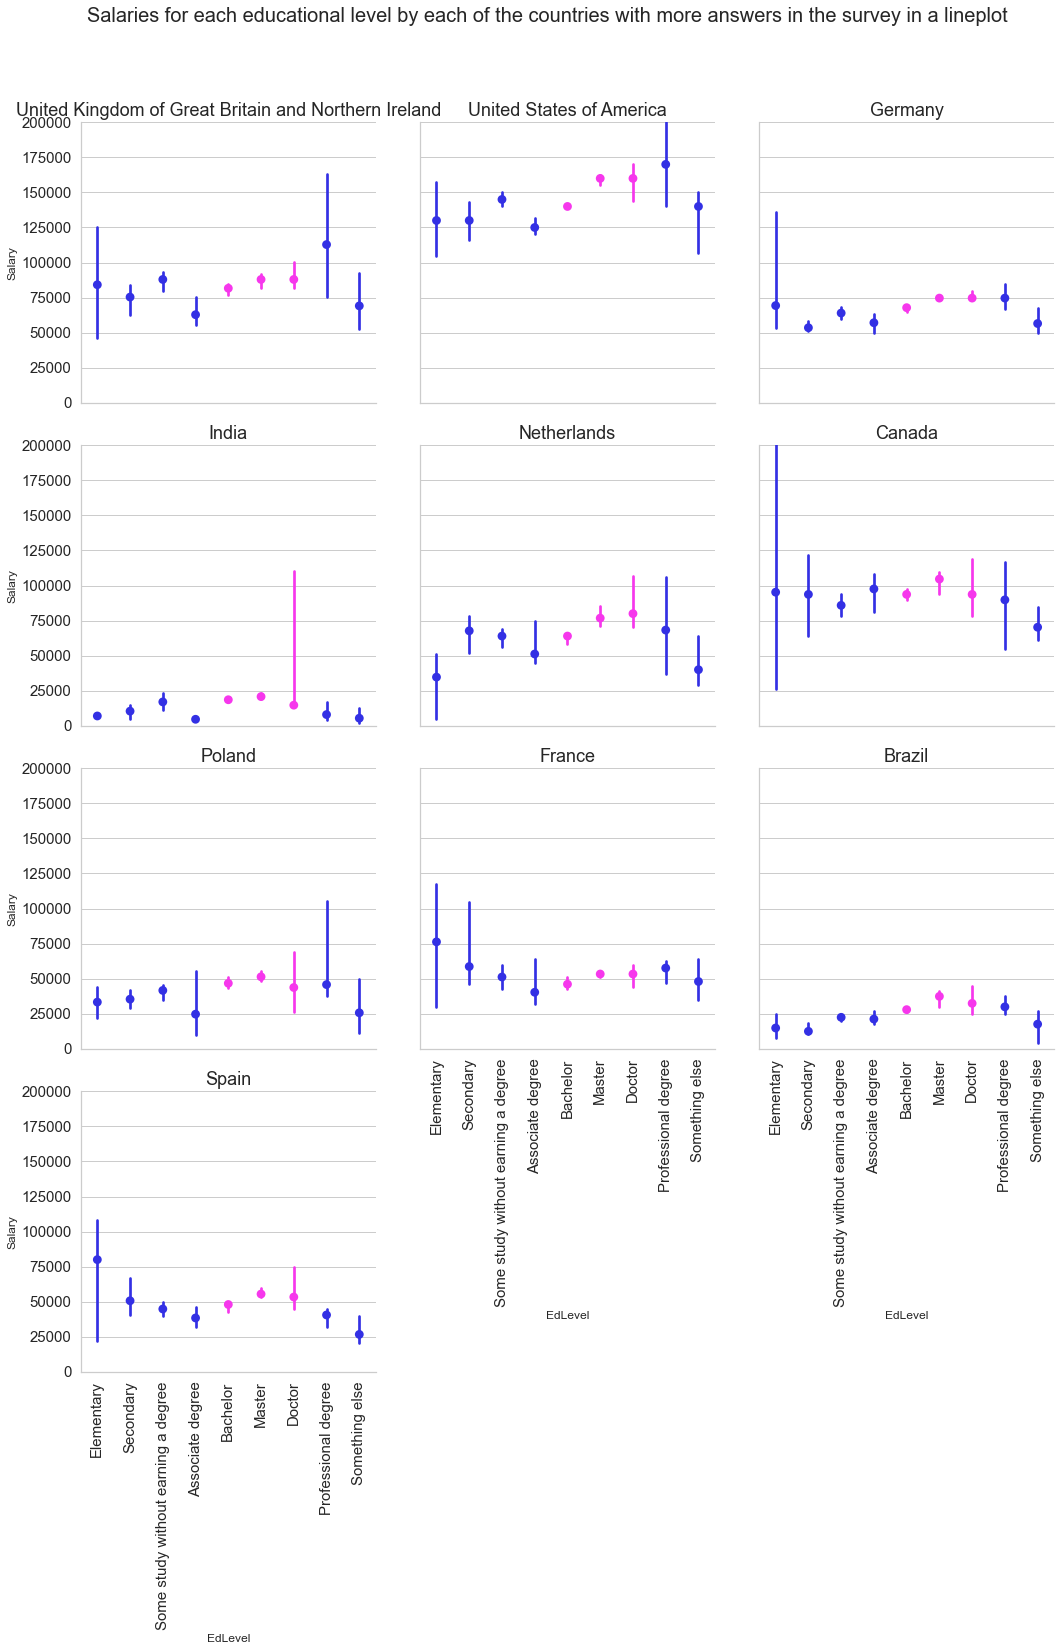

In [49]:
#Doctors, in most of those top 10 countries earn less than masters. Which diverges of the entire dataset analysis
g = sns.FacetGrid(data = top_10_countries, col = 'Country', col_order = top_10_countries.Country.unique(), col_wrap = 3, height = 5);
g.map_dataframe(sns.pointplot, y = 'Salary',x = 'EdLevel', estimator = np.median, order = order_EdLevel, palette = palette_EdLevel);
g.set(ylim = (0, 200000));
g.set_titles(col_template = '{col_name}', size = 18);
g.set_xticklabels(rotation = 90, fontdict = {'fontsize': 15});
g.set_yticklabels(labels = range(0, 225000, 25000), fontdict = {'fontsize': 15});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Salaries for each educational level by each of the countries with more answers in the survey in a lineplot', fontsize = 20);

We can see above that in some countries, like USA, the relationship between educational level and salary for bachelors, masters and doctors doesn't follow the tendency off all countries together

Below there are two plots of salary per years coding experience.

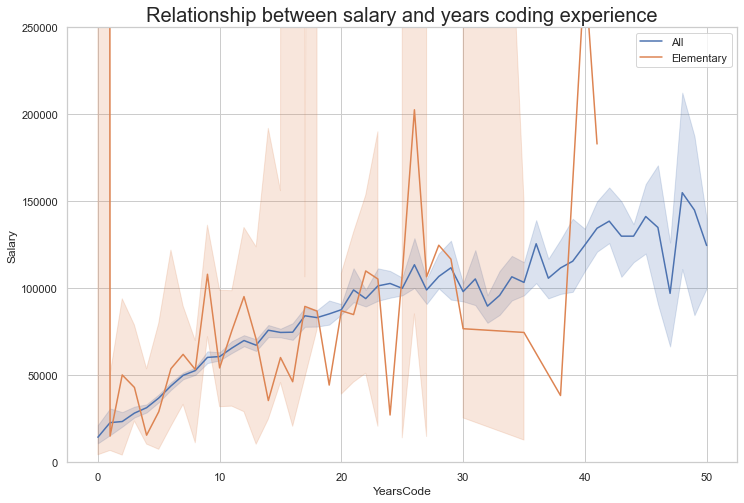

In [50]:
ax1 = sns.lineplot(x = 'YearsCode', y = 'Salary',estimator = np.median, data = df_use, label = 'All')
ax1.set_ylim([0, 250000])
ax2 = sns.lineplot(x = 'YearsCode', y = 'Salary', estimator = np.median, data = df_use[df_use.EdLevel == 'Elementary'], label = 'Elementary')
ax2.set_ylim([0, 250000]);
plt.title('Relationship between salary and years coding experience', fontsize = 20);

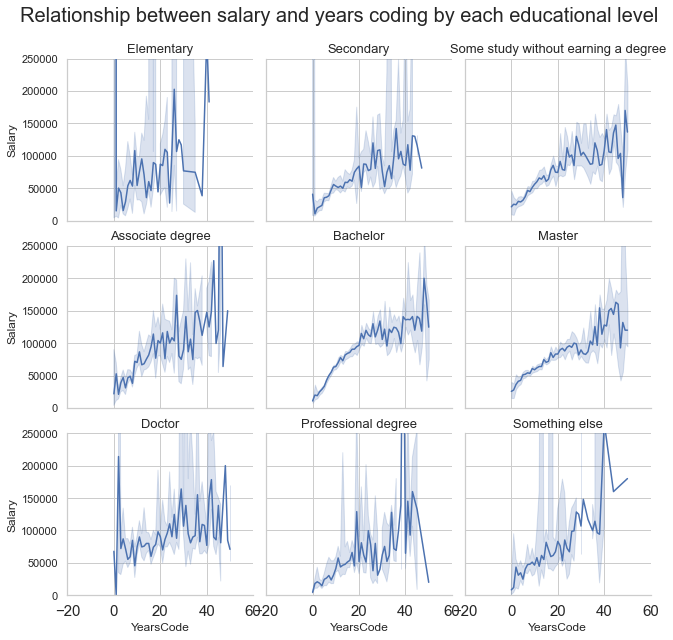

In [51]:
g = sns.FacetGrid(data = df_use, col = 'EdLevel', col_wrap = 3, col_order = order_EdLevel);
g.map(sns.lineplot, 'YearsCode',  'Salary', estimator = np.median);
plt.ylim(0, 250000);
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between salary and years coding by each educational level', fontsize = 20);
g.set_titles(col_template = '{col_name}', size = 13);
g.set_xticklabels(fontsize = 15);

We can see here that the increase of salaries with the increase of coding experience for elementary is noisy. This means that probably people with only elementary school diverge a lot in the life story and it's not possible to infer any kind of comportament for those with only elementary school. Maybe there a lot of people earning money from rich parents or others ununsual things.

<h3>Question 2: What's the relationship between gender and educational level ?</h3>

Text(0.5, 1.0, 'Salary per gender')

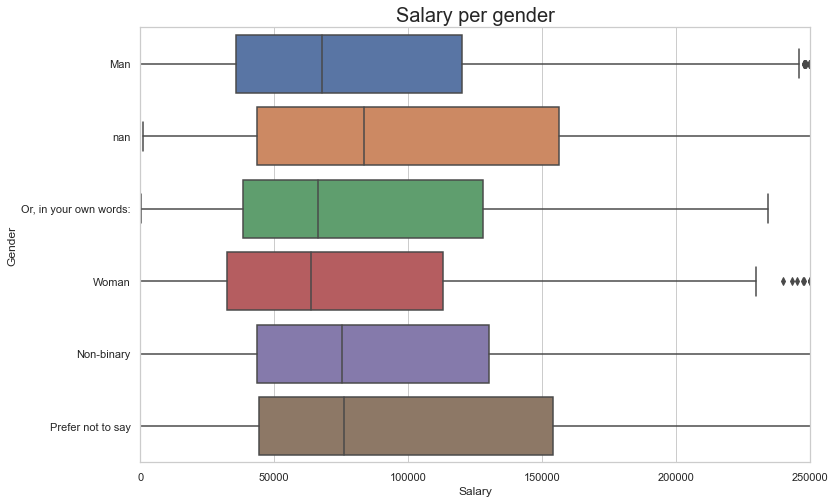

In [52]:
# Queers' and men's salaries are competitive even with queer having less scholarity and less years coding, 
# the lesser salaries of women are acording with years coding experience
sns.boxplot(data = df_use, y = 'Gender', x = 'Salary')
plt.xlim(0,250000);
plt.title('Salary per gender', fontsize = 20)

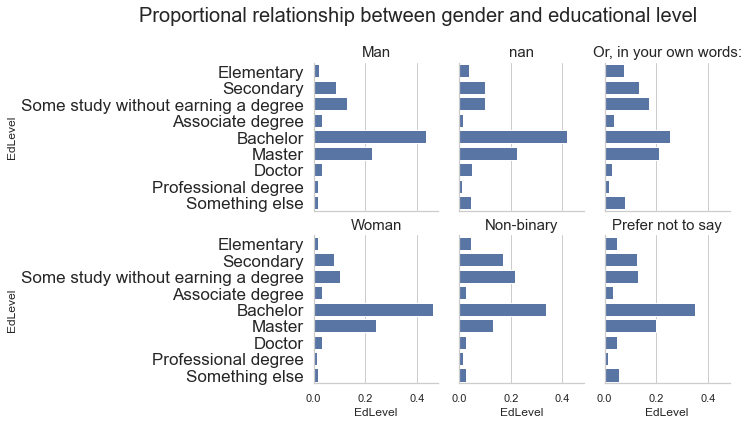

In [53]:
# Queers have less scholarity, are youger, but earn better salaries 
g = sns.FacetGrid(data = df_use, col = 'Gender', col_wrap = 3);
g.map_dataframe(countplot_normalized, y = 'EdLevel', order = order_EdLevel);
g.set_titles(col_template = '{col_name}', size = 15);
g.set_yticklabels(labels = order_EdLevel, fontsize = 17)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Proportional relationship between gender and educational level', fontsize = 20);

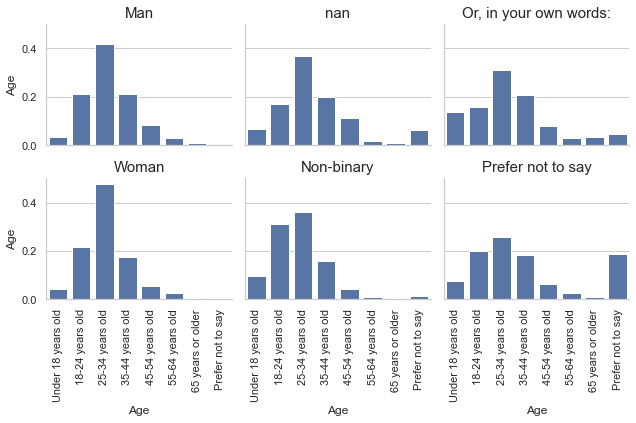

In [54]:
g = sns.FacetGrid(data = df_use, col = 'Gender', col_wrap = 3)
g.map_dataframe(countplot_normalized, x = 'Age', order = order_Age);
g.set_titles(col_template = '{col_name}', row_template = '', size = 15);

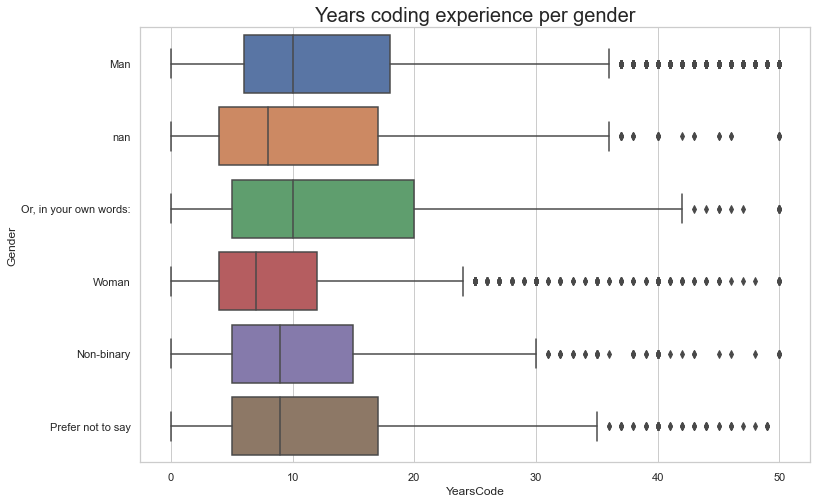

In [55]:
sns.boxplot(x = 'YearsCode', y = 'Gender', data = df_use);
plt.title('Years coding experience per gender', fontsize = 20);

We can see above that non-binary/queer people earn more than others (first figure). With the second and thirdy figures we can see more. We see they earn more even though being youger and with lower degrees. And with less coding experience than men.

In [56]:
df_use.groupby('Gender')['Country'].value_counts(normalize = True).loc['Non-binary']

Country
United States of America                                0.334746
Germany                                                 0.088136
United Kingdom of Great Britain and Northern Ireland    0.083898
Canada                                                  0.045763
France                                                  0.042373
                                                          ...   
Timor-Leste                                             0.000847
Uganda                                                  0.000847
United Arab Emirates                                    0.000847
Uruguay                                                 0.000847
Uzbekistan                                              0.000847
Name: Country, Length: 89, dtype: float64

In [57]:
top_10_countries.groupby('Country')['Salary'].median().sort_values(ascending = False)

Country
United States of America                                145000.0
Canada                                                   93701.0
United Kingdom of Great Britain and Northern Ireland     82922.0
Germany                                                  69318.0
Netherlands                                              66119.0
France                                                   51192.0
Spain                                                    47990.0
Poland                                                   47172.0
Brazil                                                   27420.0
India                                                    18576.0
Name: Salary, dtype: float64

We see above that 33% of Non-binaries, queers and gender non-conformings are in USA. This and the high salaries in USA probably
causes a high impact on the salaries of queers, which justifies what is said above

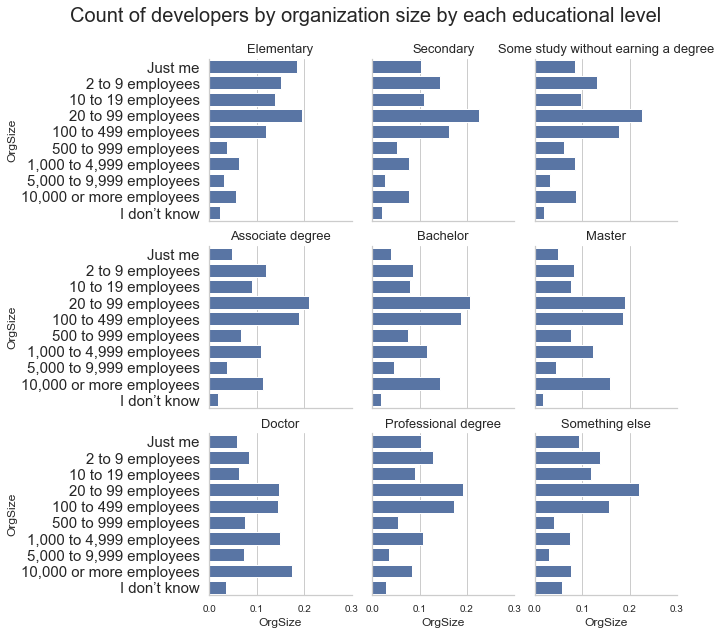

In [58]:
#With increase of titulation there is an increase in company
g = sns.FacetGrid(df_use, col = 'EdLevel' , col_wrap = 3, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, y = 'OrgSize', order = order_OrgSize);
g.set_titles(col_template = '{col_name}', size = 13);
g.set_xticklabels(fontdict = {'fontsize': 10});
g.set_yticklabels(labels = order_OrgSize, fontdict = {'fontsize': 15});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of developers by organization size by each educational level', fontsize = 20);

<h3 id = 'thirdy question'>Question 3: What kind of jobs is more likely to people with each degree work with ? </h3>

A countplot of developer type for each educational level can help us to answer that.

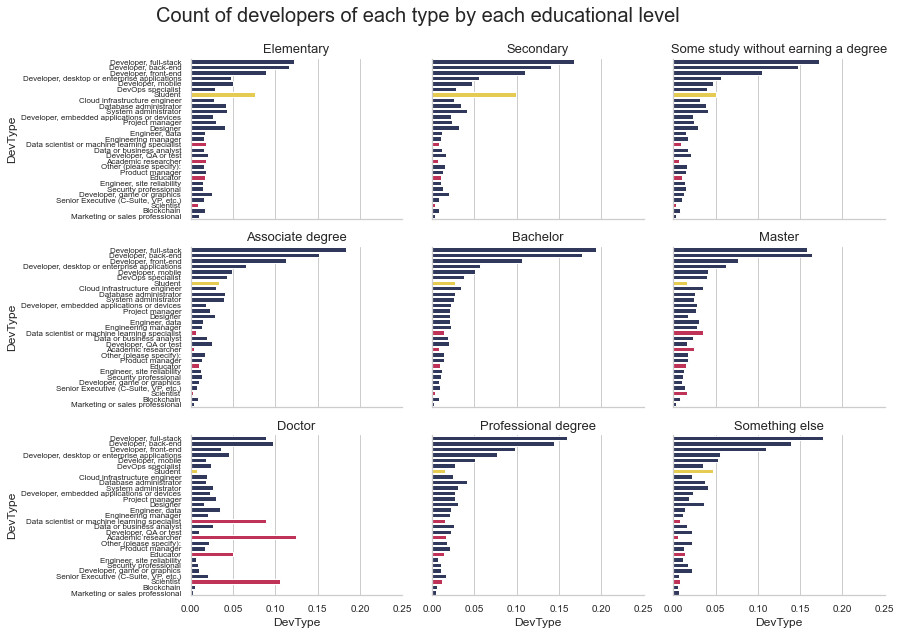

In [59]:
g = sns.FacetGrid(exploded_DevType, col = 'EdLevel' , col_wrap = 3, aspect = 1.5, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, y = 'DevType', order = order_DevType, palette = palette_DevType);
g.set_yticklabels(labels = order_DevType, fontsize = 10);
g.set_titles(col_template = '{col_name}', size = 13);
g.set_xticklabels(fontdict = {'fontsize': 10});
g.set_yticklabels(labels = order_DevType, fontdict = {'fontsize': 8});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of developers of each type by each educational level', fontsize = 20);

Doctors are much more inclined to be Scientists, Academic Researchers, data science or machine learning specialist and educators than others developers. Those who have only primary school and secondary school are more propense to be student,  probably studying in secondary school and bachelor respectively.

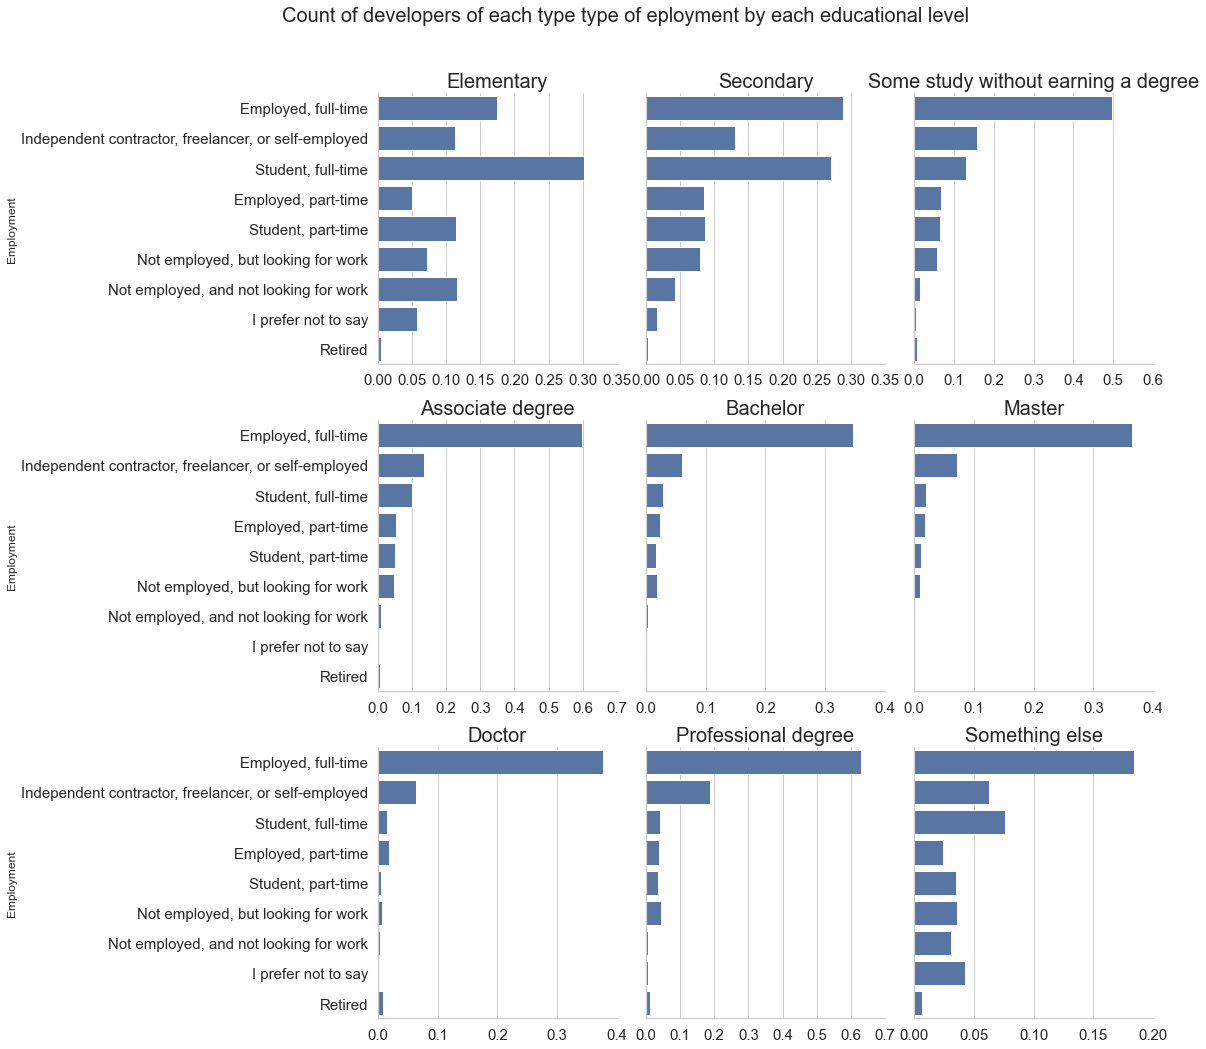

In [60]:
g = sns.FacetGrid(exploded_Employment, col = 'EdLevel' , sharex = False, col_wrap = 3, height = 5, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, y = 'Employment', order = exploded_Employment.Employment.value_counts().index);
g.set_titles(col_template = '{col_name}', size = 20);
g.set_xticklabels(fontdict = {'fontsize': 15});
g.set_yticklabels(labels = exploded_Employment.Employment.value_counts().index, fontdict = {'fontsize': 15});
g.set_xlabels('')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of developers of each type type of eployment by each educational level', fontsize = 20);


This countplot above enphisizes that many of those who have only elementary school or secondary school act as student full time